In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
class Parabola():
    def __init__(self, a, vertex_x=0, vertex_y=0):
        self.a = a  
        self.prev = 1
        
    def get_abscissa(self, y):
        return y**2 / (4*self.a)
        
    def draw_locus(self, x):
        return np.append(x[::-1], x), np.append((2 * np.sqrt(self.a * x))[::-1], -2 * np.sqrt(self.a * x))
    
    def draw_tangent(self, at_point_y):
        at_point_x = at_point_y**2 / (4*self.a)
        x = np.linspace(at_point_x-1, at_point_x+1, 5)
        return x, [(2*self.a/at_point_y) * (i - at_point_x) + at_point_y if at_point_y != 0 else 0 for i in x]
    
    def draw_normal(self, at_point_y):
        at_point_x = at_point_y**2 / (4*self.a)
        x = np.linspace(at_point_x-1, at_point_x+1, 5)
        return x, (at_point_y / (2*self.a)) * (at_point_x - x) + at_point_y
    
    def get_reflected_ordinate(self, x, x_incident, y_incident):
        if self.a == x_incident:
            if self.prev > 0:
                self.prev = -1
                return x_incident, y_incident
            else:
                self.prev = 1
                return x_incident, -1*y_incident - 1
                        
        elif x_incident < self.a:
            return x, (4*self.a*y_incident * (x_incident - x)) / (4*self.a**2 - y_incident**2) + y_incident
        else:
            if x == x_incident:
                return x, (4*self.a*y_incident * (x_incident - x)) / (4*self.a**2 - y_incident**2) + y_incident
            return self.a/2, ((4*self.a*y_incident * (x_incident - self.a/2)) / (4*self.a**2 - y_incident**2) + y_incident)

In [3]:
class ParallelIncidentLight():
    def __init__(self, y, reflector):
        self.y = y
        self.reflector = reflector
        self.x_incident = reflector.get_abscissa(y)
        self._is_reflected = False
    
    @property
    def is_reflected(self):
        return bool(self._is_reflected)
    
    @is_reflected.setter
    def is_reflected(self, value):
        
        if value == True or value == False:
            self._is_reflected = value 
        elif not isinstance(value, (bool, int, float)):
            raise TypeError (f"Invalid type for value. Expected any of type bool, int, or float but got {str(type(value))[8:-2]}")
        else:
            raise ValueError (f"Invalid value. Expected any of type bool, 1, or 0 but got {value}")
            
    def get_ordinate(self, x):
        if self.is_reflected:
            return self.reflector.get_reflected_ordinate(x, self.x_incident, self.y)
        else:
            return x, self.y

In [4]:
def update_plot(frame):
    
    ax.clear()
    
    ax.plot(*par.draw_locus(np.linspace(0, 10, 100)))
    
    if frame > i.x_incident and not i.is_reflected:
        ax.plot([i_init, frame], [i.y, i.y], label='incident')
 
    else:
        ax.plot([i_init, i.x_incident], [i.y, i.y], label='incident')
        ax.plot(*par.draw_tangent(q), c='k', ls='--', label='tangent')
        ax.plot(*par.draw_normal(q), ls='--', c='brown', label='normal')

        i.is_reflected = 1
    
        x_incident_coord = list(i.get_ordinate(i.x_incident))
        i_init_coord = list(i.get_ordinate(frame))
        ax.plot([x_incident_coord[0], i_init_coord[0]], [x_incident_coord[1], i_init_coord[1]], label='reflected')
    
    ax.hlines(0, -10, 20, ls='--', color='k')
    ax.scatter([a], [0], marker='*', color='r', s=100, label='Focus')
    ax.axis('scaled')
    ax.set_xlim(-10, 20)
    ax.set_ylim(-15, 15)
    ax.axis('off')
    ax.legend()
    


<IPython.core.display.Javascript object>


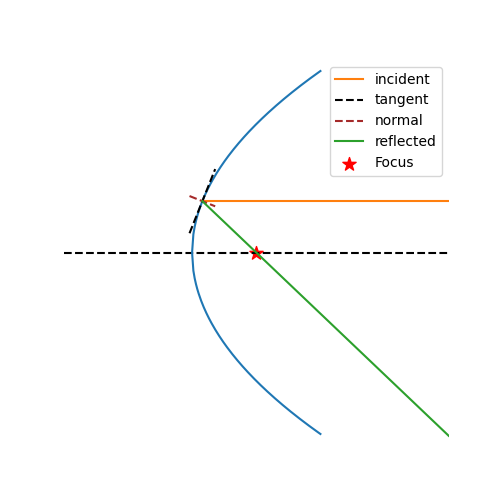

In [5]:
a = 5
par = Parabola(a)

i_init=20
q = 4
i = ParallelIncidentLight(q, par)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

frames = list(np.linspace(i_init, i.x_incident, 10)) + list(np.linspace(i.x_incident, i_init, 10))
ani = animation.FuncAnimation(fig=fig, func=update_plot, frames=frames, interval=100, 
                                         blit=False, repeat=0)
ani.save(f'Parabolic_Reflection.gif', writer=animation.PillowWriter(fps=1000//100));

### Here is the saved gif in motion:

![Parabolic_Reflection.gif](Parabolic_Reflection.gif)